In [1]:
import pandas as pd 
import numpy as np 
import torch
# commas every 000, .2 float precision
pd.set_option('display.float_format', lambda x: f"{x:,.2f}")

# Sets 1k and 1m instead of 1000 and 1000000.00
# pd.set_eng_float_format(use_eng_prefix=True)

# Sets accuracy after the decimal point 
# pd.set_eng_float_format(accuracy = 2)

# Remove custom formatting and go back to default 

# pd.reset_option("display.float_format")


In [2]:
import torch 

t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c) #celcius temps 
t_u = torch.tensor(t_u) #unknown units 


In [3]:
# assume linear model 
# t_c = w * t_u + b

- **Loss Function** is a function that **computes a single numerical** value that the learning process will attempt to minimize 
- we need to make sure the loss function make the loss positive both when the predicted value is greater than & when it is less than the true value. 
    - |predicted - true_value|
    - (predicted - true_value)^2

In [4]:
def model(t_u, w, b):
    """
    Returns a tensor of predicted values using the inputs in a linear model. 
    t_u: Dependent variable. Input Tensor. Data we will use to predict the output t_c 
    w: Weight parameter. PyTorch scalar (zero-dimensional tensor)
    b: Bias parameter (Offset parameter). The bias is what the output would be if all the inputs were zero. 
    """

    return w * t_u + b

In [5]:
def loss_fn(t_p, t_c): 
    """
    Mean square loss function. 
    t_p: predicted value
    t_c: actual value
    """
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()


In [6]:
w = torch.ones(())
b = torch.zeros(())
t_p = model(t_u, w, b) 
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [7]:
loss = loss_fn(t_p, t_c)
loss

tensor(1763.8848)

**Gradient Descent:** Compute the rate of change of the loss with respect to each parameter, and modify each parameter in the direction of decreasing loss. We can estimate the rate of change by adding a small number to `w` and `b` and see how much the loss changes in that neighborhood. 

**Gradient:** A vector of derivatives created by taking the individual derivatives of the loss with respect to each parameter. 

In [8]:
delta = 0.1 
loss_rate_of_change_w = (loss_fn(model(t_u, w + delta, b), t_c ) - loss_fn(model(t_u, w-delta, b), t_c)) / (2.0 * delta) 

In [9]:
loss_rate_of_change_b = (loss_fn(model(t_u, w, b+delta), t_c) - loss_fn(model(t_u, w, b-delta), t_c)) / (2.0 * delta)

In [10]:
learning_rate = 1e-2
w = w-learning_rate*loss_rate_of_change_w

In [11]:
def dloss_fn(t_p, t_c): 
    dsq_diffs = 2*(t_p-t_c)/t_p.size(0) 
    return dsq_diffs

In [12]:
def dmodel_dw(t_u, w, b): 
    return t_u 

In [13]:
def dmodel_db(t_u, w, b):
    return 1.0 

In [14]:
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c) 
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b) 
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])


**Epoch:** A training iteration during which we update the parameters for all of our training samples. 

In [18]:
def training_loop(
        n_epochs: int, 
        learning_rate: float, 
        params: tuple[torch.tensor, torch.tensor], 
        t_u: torch.tensor, 
        t_c: torch.tensor 
        ):

    for epoch in range(1, n_epochs + 1): 
        w, b = params

        # forward pass 
        pred = model(t_u, w, b) 
        loss = loss_fn(pred, t_c)

        # backward pass 
        grad = grad_fn(t_u, t_c, pred, w, b)

        params = params - learning_rate * grad 

        print(f'Epoch {epoch}, Loss {float(loss)}, \n\t Gradients (w,b): {grad}')
    return params 


In [22]:
t_un = t_u*.1
params = training_loop(
    n_epochs=5000, 
    learning_rate=1e-2,
    params = torch.tensor([1.0, 0.0]),
    t_u = t_un,
    t_c = t_c
    )

Epoch 1, Loss 80.36434173583984, 
	 Gradients (w,b): tensor([-77.6140, -10.6400])
Epoch 2, Loss 37.574913024902344, 
	 Gradients (w,b): tensor([-30.8623,  -2.3864])
Epoch 3, Loss 30.871076583862305, 
	 Gradients (w,b): tensor([-12.4631,   0.8587])
Epoch 4, Loss 29.756193161010742, 
	 Gradients (w,b): tensor([-5.2218,  2.1327])
Epoch 5, Loss 29.507152557373047, 
	 Gradients (w,b): tensor([-2.3715,  2.6310])
Epoch 6, Loss 29.3924560546875, 
	 Gradients (w,b): tensor([-1.2492,  2.8241])
Epoch 7, Loss 29.298828125, 
	 Gradients (w,b): tensor([-0.8071,  2.8970])
Epoch 8, Loss 29.208717346191406, 
	 Gradients (w,b): tensor([-0.6325,  2.9227])
Epoch 9, Loss 29.119415283203125, 
	 Gradients (w,b): tensor([-0.5633,  2.9298])
Epoch 10, Loss 29.030488967895508, 
	 Gradients (w,b): tensor([-0.5355,  2.9295])
Epoch 11, Loss 28.941877365112305, 
	 Gradients (w,b): tensor([-0.5240,  2.9264])
Epoch 12, Loss 28.853565216064453, 
	 Gradients (w,b): tensor([-0.5190,  2.9222])
Epoch 13, Loss 28.7655525207

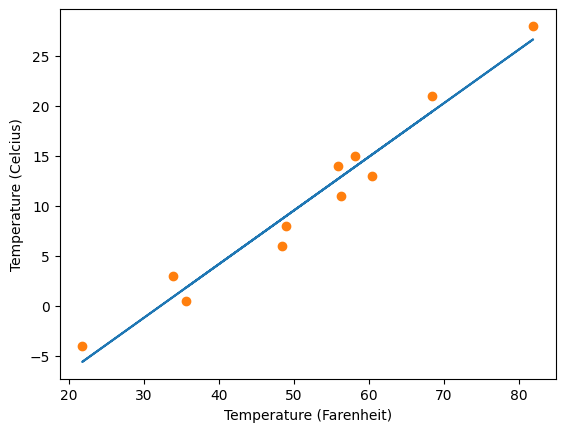

In [26]:
from matplotlib import pyplot as plt 
t_p = model(t_un, *params)
fig=plt.figure()
plt.xlabel("Temperature (Farenheit)")
plt.ylabel("Temperature (Celcius)")
plt.plot(t_u.numpy(), t_p.numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [31]:
normalized_prediction = model(t_un, *params)
normalized_prediction

tensor([ 1.8593, 12.7008, 13.9352, 26.6552, 12.9155,  8.9439,  0.8932, -5.6009,
         8.6755, 15.1160, 19.4097])